# Objetivo
O objetivo deste trabalho é analisar as músicas mais tocadas no Spotify em 2023, focando na distribuição e nas particularidades de músicas solo, duetos, trios e quartetos. Busca-se entender como essas categorias se comparam em popularidade (número de streams) e características musicais específicas.

# Visão Geral
Explorar a composição artística e as características das músicas mais populares no Spotify em 2023. A análise é dividida em várias etapas:

## Comparação de Popularidade: Solo vs Colaborações:
- Investigar como a colaboração entre artistas afeta a popularidade das músicas no Spotify medida pelo número médio de streams. As músicas foram categorizadas pelo número de artistas (solo, dueto, trio e quarteto), e a média de streams será calculada para cada categoria. O gráfico comparativo ajudará a identificar tendências na popularidade em relação ao número de artistas envolvidos.

## Distribuição de Categorias de Artistas Pelo Total De Músicas:
- O objetivo desta análise é compreender a distribuição da quantidade das músicas no Spotify com base no número de artistas colaborando em cada faixa. As músicas foram categorizadas em solo, duplas, trios e quartetos. Visualizar essas distribuições ajudará a entender as tendências de colaboração entre artistas e seu impacto na produção musical no Spotify.


## Análise das 100 Músicas Mais Tocadas e Categorias de Artistas:
 - Estudar como a colaboração entre artistas impacta a popularidade das músicas no Spotify, medida pelo número de streams. Foram analisadas as músicas mais populares (Top 100) e essas músicas foram categorizadas em solo, duplas, trios e quartetos. O intuito é identificar tendências predominantes nas colaborações entre artistas de sucesso. O gráfico resultante facilitará a visualização e a comparação dessas categorias.

## Características Musicais por Categorias de Artistas x Top 100:
 - Identificar como as características musicais variam conforme o número de artistas envolvidos (solo, duplas, trios, quartetos) e compará-las com as 100 músicas mais tocadas. Avaliando as médias de danceability, valence, energy, acousticness, instrumentalness, liveness e speechiness, busca-se identificar padrões e tendências, além de compreender a influência da colaboração artística no sucesso das músicas.

## Funções

In [1]:
def read_csv_file_from_github(url, encoding):
    """
    Lê um arquivo CSV de uma URL no GitHub com a codificação especificada.
    """
    try:
        df = pd.read_csv(url, encoding=encoding)
        print("Arquivo lido com sucesso!")
        return df
    except UnicodeDecodeError as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

def converter_para_numerico(df, coluna):
    """
    Converte uma coluna do DataFrame para valores numéricos.
    """
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    return df

def mapear_categorias(df, coluna_artistas, categorias):
    """
    Mapeia categorias de uma coluna de artistas para uma nova coluna 'category'.
    """
    df.loc[:, 'category'] = df[coluna_artistas].map(categorias)
    return df

def gerar_grafico_barras(df, x_col, y_col, titulo, xlabel, ylabel, colors, figsize=(10, 6)):
    """
    Gera um gráfico de barras a partir dos dados do DataFrame.
    """
    plt.figure(figsize=figsize)
    plt.bar(df[x_col],  df[y_col], color=colors)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def gerar_grafico_pizza(counts, categorias, colors, titulo, figsize=(10, 6)):
    """
    Gera um gráfico de pizza a partir dos dados do DataFrame.
    """
    plt.figure(figsize=figsize)
    plt.pie(counts, labels=[f'{label} ({count})' for label, count in zip(counts.index, counts)], autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(titulo)
    plt.axis('equal')
    plt.show()

def gerar_grafico_barras_horizontais(counts, percentages, titulo, xlabel, ylabel, colors, figsize=(10, 6)):
    """
    Gera um gráfico de barras horizontais a partir dos dados do DataFrame com porcentagens.
    """
    sorted_counts = counts.sort_values(ascending=True)
    sorted_percentages = percentages.loc[sorted_counts.index]
    plt.figure(figsize=figsize)
    bars = plt.barh(sorted_counts.index, sorted_counts, color=colors)

    for bar, percentage in zip(bars, sorted_percentages):
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def gerar_grafico_radar(dados, labels, features, titulo, colors, figsize=(8, 8)):
    """
    Gera um gráfico radar com os dados, rótulos e características.
    """
    dados = [d + [d[0]] for d in dados]
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    for d, label, cor in zip(dados, labels, colors):
        ax.fill(angles, d, color=cor, alpha=0.25, label=label)
        ax.plot(angles, d, color=cor, linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features)
    ax.set_title(titulo)
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))
    plt.show()

## Leitura do arquivo

In [2]:
#import bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# utilizando a funçao read_csv_file_from_github
# URL do arquivo CSV no GitHub
url = "https://raw.githubusercontent.com/taai21/projetoavaliativo/main/spotify-2023.csv"

# Usando a função para ler o arquivo
spotify_data = read_csv_file_from_github(url, encoding='latin1')
spotify_data

Arquivo lido com sucesso!


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Limpeza dos dados

In [5]:
##Limpa colunas não necessárias para a análise
spotify_data.drop(columns=['bpm', 'key', 'mode', 'in_shazam_charts', 'in_deezer_charts', 'in_deezer_playlists', 'in_apple_charts', 'in_apple_playlists'], inplace=True)


In [6]:
##Vaerificar se há alguma linha duplicada
spotify_data.duplicated().sum()


0

In [7]:
#Verificar se há nome de músicas repetidos na coluna track_name
spotify_data[spotify_data['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,47,15,52,38,13,29,5
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,60,86,32,88,0,34,6
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,84,72,74,10,0,34,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,70,31,44,84,0,9,39
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,69,63,45,48,0,18,4
852,Numb,"Marshmello, Khalid",2,2022,6,10,3879,2,295307001,91,63,77,12,1,10,5
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,56,52,64,11,0,45,7
922,Miss You,Southstar,1,1982,5,16,2020,0,154356956,66,24,58,17,0,19,5


In [8]:
##Conversão da coluna strams para datatype numérico
converter_para_numerico(spotify_data,'streams')
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   danceability_%        953 non-null    int64  
 10  valence_%             953 non-null    int64  
 11  energy_%              953 non-null    int64  
 12  acousticness_%        953 non-null    int64  
 13  instrumentalness_%    953 non-null    int64  
 14  liveness_%            953 non-null    int64  
 15  speechiness_%         9

In [9]:
##Exclui as linhas que tem track name duplicados, deixando somente a primeira opção
spotify_data = spotify_data.drop_duplicates(subset='track_name', keep='first')


In [10]:
#verificação se há duplicados no campo de track_name
spotify_data[spotify_data['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


## ANÁLISES

## Comparação de Popularidade: Média de Streams entre as Categorias

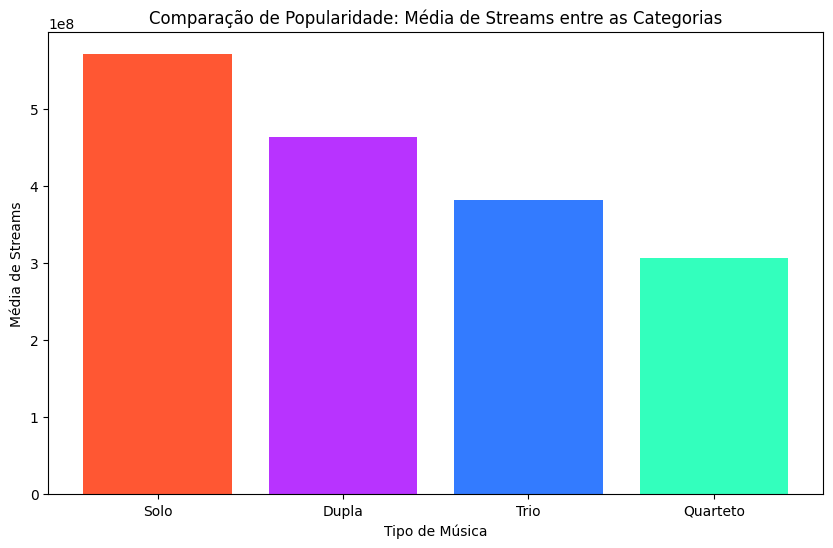

,Número de artistas,Média de Streams
0,Solo,5.708059e+08
1,Dupla,4.631014e+08
2,Trio,3.813421e+08
3,Quarteto,3.061062e+08


In [11]:

# Identificando músicas com diferentes números de artistas
solo_tracks = spotify_data[spotify_data['artist_count'] == 1]
dupla_tracks = spotify_data[spotify_data['artist_count'] == 2]
trio_tracks = spotify_data[spotify_data['artist_count'] == 3]
quarteto_tracks = spotify_data[spotify_data['artist_count'] == 4]

# Calculando a média de streams para cada grupo
avg_streams_solo = solo_tracks['streams'].mean()
avg_streams_dupla = dupla_tracks['streams'].mean()
avg_streams_trio = trio_tracks['streams'].mean()
avg_streams_quarteto = quarteto_tracks['streams'].mean()

# Criando um DataFrame para facilitar a visualização
df_mean = pd.DataFrame({
    'Número de artistas': ['Solo', 'Dupla', 'Trio', 'Quarteto'],
    'Média de Streams': [avg_streams_solo, avg_streams_dupla, avg_streams_trio, avg_streams_quarteto]
})

#gerando gráfico de barras
titulo = 'Comparação de Popularidade: Média de Streams entre as Categorias'
xlabel = 'Tipo de Música'
ylabel = 'Média de Streams'
colors = ['#FF5733', '#B833FF', '#337BFF', '#33FFBD']
gerar_grafico_barras(df_mean, 'Número de artistas', 'Média de Streams', titulo, xlabel, ylabel, colors)

# Exibindo os resultados das médias
df_mean


## Distribuição de Categorias de Artistas Pelo Total De Músicas

<ipython-input-1-cdc7a476eae6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'category'] = df[coluna_artistas].map(categorias)


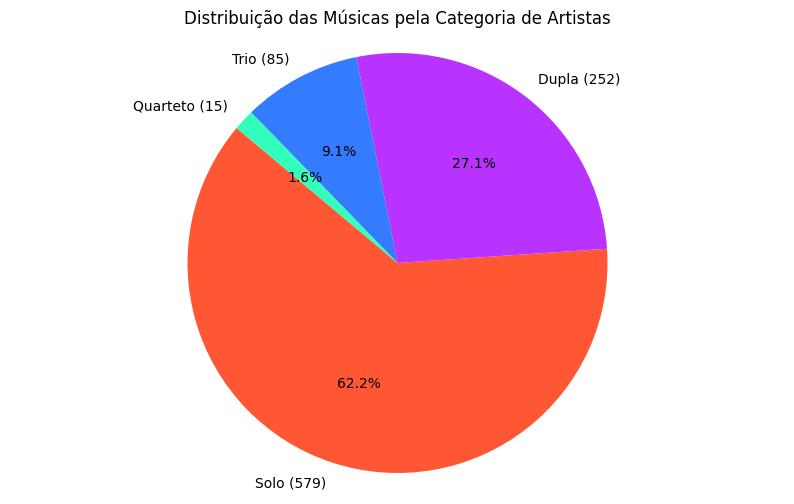

In [12]:
#cria uma nova coluna de category para mapear as músicas pelas categorias:
categorias = {
    1: 'Solo',
    2: 'Dupla',
    3: 'Trio',
    4: 'Quarteto'
}
spotify_data = mapear_categorias(spotify_data, 'artist_count', categorias)

# Contar o número de músicas em cada categoria
category_counts = spotify_data['category'].value_counts().reindex(categorias.values(), fill_value=0)
# Calcular a porcentagem de cada categoria
total_all = category_counts.sum()
percentage_counts_all = (category_counts / total_all) * 100

# Plotar os dados
colors = ['#FF5733', '#B833FF', '#337BFF', '#33FFBD']
titulo = 'Distribuição das Músicas pela Categoria de Artistas'
gerar_grafico_pizza(category_counts, categorias, colors, titulo)



## Análise das 100 Músicas Mais Tocadas Com Foco Nas Categorias de Artistas

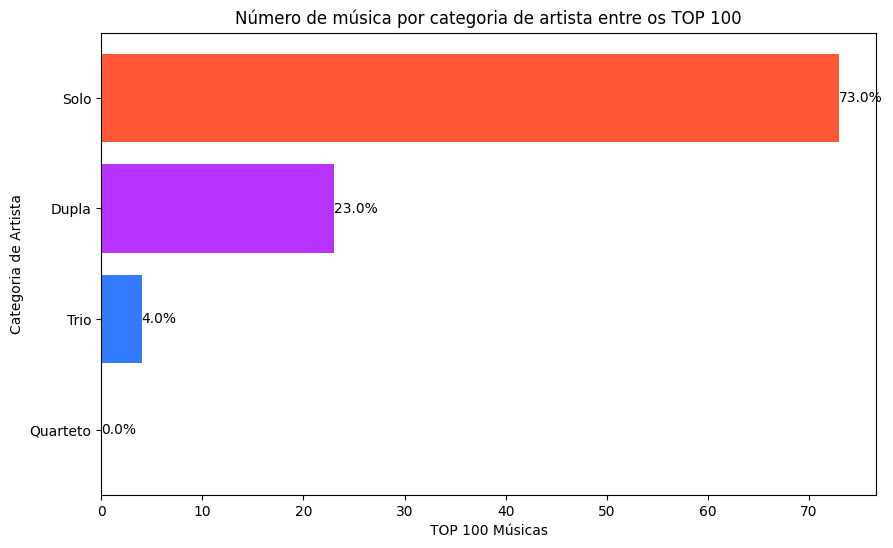

category
Solo        73
Dupla       23
Trio         4
Quarteto     0
Name: count, dtype: int64


In [13]:
#cria uma nova coluna de category para mapear as músicas pelas categorias:
categorias = {
    1: 'Solo',
    2: 'Dupla',
    3: 'Trio',
    4: 'Quarteto'
}
spotify_data = mapear_categorias(spotify_data, 'artist_count', categorias)

# Filtrar as top 100 músicas por streams
top_100_songs = spotify_data.nlargest(100, 'streams')

# Contar o número de músicas em cada categoria para as top 100 músicas
top_100_category_counts = top_100_songs['category'].value_counts().reindex(categorias.values(), fill_value=0)

# Calcular a porcentagem de cada categoria
total = top_100_category_counts.sum() ## 100
percentage_counts = (top_100_category_counts / total) * 100

# Plotar os dados
titulo = 'Número de música por categoria de artista entre os TOP 100'
xlabel = 'TOP 100 Músicas'
ylabel = 'Categoria de Artista'
colors = ['#33FFBD', '#337BFF', '#B833FF', '#FF5733']
gerar_grafico_barras_horizontais(top_100_category_counts, percentage_counts, titulo, xlabel, ylabel, colors)
print(top_100_category_counts)


## Características Musicais por Categorias de Artistas x Top 100.

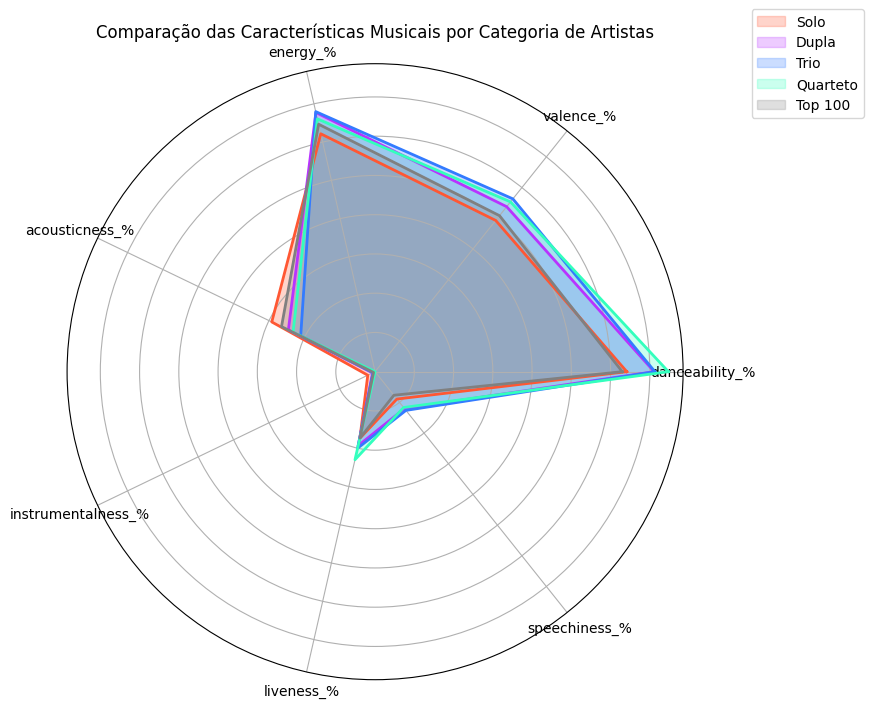

In [14]:
# Filtrando músicas por número de artistas (um data frame para cada categoria)
solo_songs = spotify_data[spotify_data['artist_count'] == 1]
dupla_songs = spotify_data[spotify_data['artist_count'] == 2]
trio_songs = spotify_data[spotify_data['artist_count'] == 3]
quarteto_songs = spotify_data[spotify_data['artist_count'] == 4]

# Calculando as médias das características musicais para cada grupo
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
solo_means = solo_songs[features].mean().values.flatten().tolist()
dupla_means = dupla_songs[features].mean().values.flatten().tolist()
trio_means = trio_songs[features].mean().values.flatten().tolist()
quarteto_means = quarteto_songs[features].mean().values.flatten().tolist()

# Selecionando as 100 músicas mais tocadas e calculando a media delas
top_100_songs = spotify_data.nlargest(100, 'streams')
top_100_means = top_100_songs[features].mean().values.flatten().tolist()

# Dados para o gráfico de radar
dados = [solo_means, dupla_means, trio_means, quarteto_means, top_100_means]
labels = ['Solo', 'Dupla', 'Trio', 'Quarteto', 'Top 100']
colors = ['#FF5733', '#B833FF', '#337BFF', '#33FFBD', 'gray']

# Criar o gráfico de radar
gerar_grafico_radar(dados, labels, features, 'Comparação das Características Musicais por Categoria de Artistas', colors)